<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/Horse_or_Human_With_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
-O /tmp/horse-or-human.zip

--2021-02-13 13:37:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  88.3MB/s    in 1.6s    

2021-02-13 13:37:43 (88.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
-O /tmp/validation-horse-or-human.zip

--2021-02-13 13:37:43--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.176, 172.217.12.240, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2021-02-13 13:37:43 (87.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [5]:
import os

train_dir = os.path.join('/tmp/horse-or-human')
validation_dir = os.path.join('/tmp/validation-horse-or-human')

In [6]:
train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')

In [7]:
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

In [8]:
train_horses_name = os.listdir(train_horses_dir)
print (train_horses_name[:5])

['horse42-0.png', 'horse45-2.png', 'horse50-3.png', 'horse30-5.png', 'horse28-9.png']


In [9]:
train_humans_name = os.listdir(train_humans_dir)
print(train_humans_name[:5])

['human02-23.png', 'human08-09.png', 'human11-02.png', 'human09-26.png', 'human05-20.png']


In [10]:
validation_horses_name = os.listdir(validation_horses_dir)
print (validation_horses_name[:5])

['horse4-599.png', 'horse2-136.png', 'horse2-218.png', 'horse4-000.png', 'horse6-544.png']


In [11]:
validation_humans_name = os.listdir(validation_humans_dir)
print (validation_humans_name[:5])

['valhuman02-09.png', 'valhuman04-20.png', 'valhuman01-23.png', 'valhuman04-10.png', 'valhuman02-23.png']


In [12]:
print ('Total training human images: {}'.format(len(train_humans_name)))
print ('Total training horse images: {}'.format(len(train_horses_name)))
print ('Total validation human images: {}'.format(len(validation_humans_name)))
print ('Total validation horse images: {}'.format(len(validation_horses_name)))

Total training human images: 527
Total training horse images: 500
Total validation human images: 128
Total validation horse images: 128


In [13]:
%matplotlib inline

nrows = 4
ncols = 4

pic_index = 0

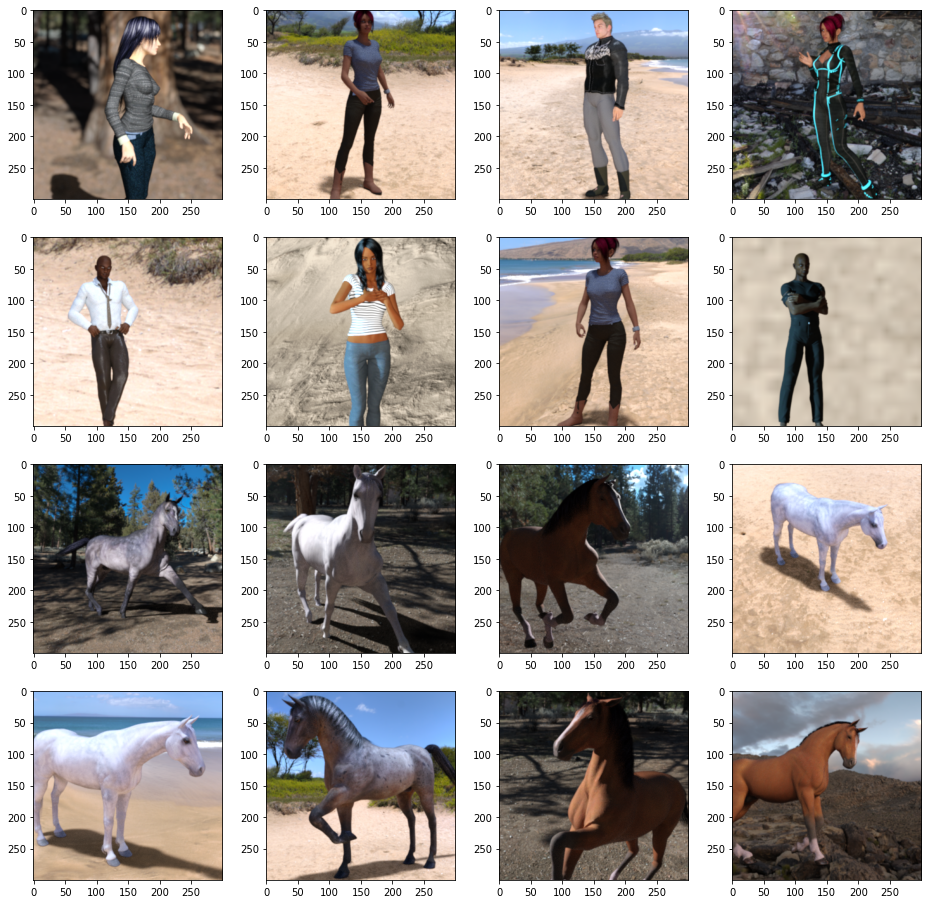

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8

next_human_pic = [os.path.join(train_humans_dir, fname) for fname in train_humans_name[pic_index-8:pic_index]]
next_horse_pic = [os.path.join(train_horses_dir, fname) for fname in train_horses_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_human_pic+next_horse_pic):
  sp = plt.subplot(nrows, ncols, i+1)
  #sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ])

In [16]:
model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics='accuracy')

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(rescale = 1./255.)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 128,
    target_size = (300, 300),
    class_mode = 'binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size = 32,
    target_size = (300, 300),
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
    train_generator,
    validation_data = validation_generator,
    epochs = 100,
    steps_per_epoch = 8,
    validation_steps = 8,
    verbose = 2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
8/8 - 21s - loss: 0.6697 - accuracy: 0.5806 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/100
8/8 - 23s - loss: 0.6379 - accuracy: 0.6875 - val_loss: 0.6273 - val_accuracy: 0.6094
Epoch 3/100
8/8 - 21s - loss: 0.6104 - accuracy: 0.6952 - val_loss: 0.8309 - val_accuracy: 0.5000
Epoch 4/100
8/8 - 21s - loss: 0.6178 - accuracy: 0.6841 - val_loss: 0.6039 - val_accuracy: 0.6172
Epoch 5/100
8/8 - 21s - loss: 0.5679 - accuracy: 0.7297 - val_loss: 0.6577 - val_accuracy: 0.5547
Epoch 6/100
8/8 - 21s - loss: 0.5422 - accuracy: 0.7475 - val_loss: 0.7815 - val_accuracy: 0.5312
Epoch 7/100
8/8 - 21s - loss: 0.5588 - accuracy: 0.7063 - val_loss: 0.7611 - val_accuracy: 0.5391
Epoch 8/100
8/8 - 21s - loss: 0.5250 - accuracy: 0.7430 - val_loss: 0.6938 - val_accuracy: 0.5703
Epoch 9/100
8/8 - 21s - loss: 0.5095 - accuracy: 0.7586 - val_loss: 1.4130 - val_accuracy: 0.5000
Epoch 10/100
8/8 - 21s - loss: 0.5611 - accuracy: 0.7208 - val_loss: 0.7901 - val_accuracy: 0.5547
Epoch 11/100
8/8 - 

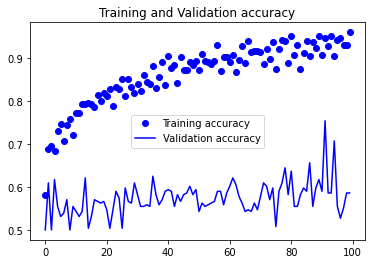

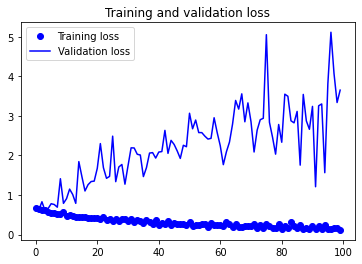

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt .title('Training and validation loss')
plt.legend()

plt.show()

As you see the test accuracy climbing steadily. At first, the validation accuracy seems to be in step, but then we'll see it varying wildly. What's happening here is that despite the image augmentation, the diversity of images is still too sparse and the validation set may also be poorly designed, namely that the type of image in it is too close to the images in the training set. If you expect the data for yourself you'll see that's the case. For example, the humans are almost always standing up and in the center of the picture, in both the training and validation sets, so augmenting the image will change it to look like something that doesn't look like what's in the validation set. So by the time the training has completed, we can see the same pattern. The training accuracy is trending towards 100 percent, but the validation is fluctuating in the 60s and 70s. Let's plot this, we can see that the training accuracy climbs steadily in the way that we would want, but the validation fluctuated like crazy. So what we can learn from this is that the image augmentation introduces a random element to the training images but if the validation set doesn't have the same randomness, then its results can fluctuate like this. So bear in mind that you don't just need a broad set of images for training, you also need them for testing or the image augmentation won't help you very much.